# Import Libaries and fetch data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path="Resources/US_Data.csv"
fields = ['FOD1P','SCHL','WAGP','AGEP','COW']
coarse_data=pd.read_csv(path, skipinitialspace=True, usecols=fields)
coarse_data['FOD1P'] = coarse_data['FOD1P'].astype(str)
coarse_data.head()

,FOD1P,SCHL,WAGP,AGEP,COW
0,6107.0,21.0,39000.0,63,3.0
1,3600.0,21.0,16000.0,22,2.0
2,6107.0,21.0,100000.0,52,1.0
3,3700.0,21.0,41000.0,65,1.0
4,2300.0,21.0,15000.0,33,1.0


In [5]:
coarse_data['FOD1P'].value_counts()

2300.0       143321
6107.0       142481
6201.0       132941
3600.0       115702
5506.0        82457
5501.0        72111
6206.0        71299
2102.0        64064
6207.0        62909
No_Degree     60000
5507.0        59514
2414.0        55551
3700.0        51447
5003.0        44418
2406.0        33553
2405.0        21123
6108.0        19156
6100.0        10497
1301.0        10415
5601.0         5956
3202.0         5266
3702.0         2809
Name: FOD1P, dtype: int64

# Clean the Data

In [6]:
education_attainment = [24.0,22.0,21.0]
refined_data = coarse_data.loc[coarse_data['SCHL'].isin(education_attainment)].copy()
refined_data['SCHL'].value_counts()

21.0    730828
22.0    311388
24.0     60873
Name: SCHL, dtype: int64

In [7]:
refined_data.head()

,FOD1P,SCHL,WAGP,AGEP,COW
0,6107.0,21.0,39000.0,63,3.0
1,3600.0,21.0,16000.0,22,2.0
2,6107.0,21.0,100000.0,52,1.0
3,3700.0,21.0,41000.0,65,1.0
4,2300.0,21.0,15000.0,33,1.0


# Replace code values with descriptive text

In [8]:
bachelors_tuition = 24116
masters_tuition = 35000
phd_tuition = 0
refined_data["Tuition"] = np.where(refined_data.SCHL == 21.0, bachelors_tuition,
                                 np.where(refined_data.SCHL == 22.0, masters_tuition,
                                          np.where(refined_data.SCHL == 24.0, phd_tuition, "NA")))

refined_data["SCHL"] = np.where(refined_data.SCHL == 21.0, "Bachelors_Degree",
                                 np.where(refined_data.SCHL == 22.0, "Masters_Degree",
                                          np.where(refined_data.SCHL == 24.0, "PHD", "NA")))
refined_data.head()

,FOD1P,SCHL,WAGP,AGEP,COW,Tuition
0,6107.0,Bachelors_Degree,39000.0,63,3.0,24116
1,3600.0,Bachelors_Degree,16000.0,22,2.0,24116
2,6107.0,Bachelors_Degree,100000.0,52,1.0,24116
3,3700.0,Bachelors_Degree,41000.0,65,1.0,24116
4,2300.0,Bachelors_Degree,15000.0,33,1.0,24116


In [9]:
refined_data["SCHL"].value_counts()

Bachelors_Degree    730828
Masters_Degree      311388
PHD                  60873
Name: SCHL, dtype: int64

In [10]:
degree_dict={'2102.0':'Computer Science',
            '3700.0':'Mathematics' ,
            '3702.0':'Statistics and Decision Science', 
            '2405.0':'Chemical Engineering',
            '2406.0':'Civil Engineering',
            '2414.0':'Mechanical Engineering', 
            '3600.0':'Biology', 
            '1301.0':'Environmental', 
            '5003.0':'Chemistry', 
            '5501.0':'Economics', 
            '5506.0':'Political Science', 
            '5507.0':'Sociology', 
            '2300.0':'General Education', 
            '3202.0':'Law', 
            '5601.0':'Construction Services', 
            '6201.0':'Accounting', 
            '6207.0':'Finance', 
            '6206.0':'Marketing and Marketing Research', 
            '6108.0':'Pharmacy, Pharmaceutical Sciences and Administration',
            '6107.0':'Nursing', 
            '6100.0':'General Medical Health Services',
            'No_Degree':'No_Degree'}
refined_data['FOD1P'] = refined_data['FOD1P'].map(degree_dict)
refined_data.head()

,FOD1P,SCHL,WAGP,AGEP,COW,Tuition
0,Nursing,Bachelors_Degree,39000.0,63,3.0,24116
1,Biology,Bachelors_Degree,16000.0,22,2.0,24116
2,Nursing,Bachelors_Degree,100000.0,52,1.0,24116
3,Mathematics,Bachelors_Degree,41000.0,65,1.0,24116
4,General Education,Bachelors_Degree,15000.0,33,1.0,24116


In [11]:
refined_data['FOD1P'].value_counts()

General Education                                       137846
Nursing                                                 135644
Accounting                                              126376
Biology                                                  87238
Marketing and Marketing Research                         69893
Economics                                                64790
Political Science                                        63855
Computer Science                                         62839
Finance                                                  59981
Sociology                                                56049
Mechanical Engineering                                   53793
Mathematics                                              48459
Chemistry                                                36709
Civil Engineering                                        32400
Chemical Engineering                                     19852
Pharmacy, Pharmaceutical Sciences and Administration   

In [43]:
# rename columns
rename_df = refined_data.copy()
rename_df.rename(columns = {'FOD1P':'Field of Study', 
                               'SCHL':'Educational Attainment', 
                               'WAGP':'Income', 'AGEP':'Age', 
                               'COW':'Class of Worker'}, inplace=True)
rename_df.head()

,Field of Study,Educational Attainment,Income,Age,Class of Worker,Tuition
0,Nursing,Bachelors_Degree,39000.0,63,3.0,24116
1,Biology,Bachelors_Degree,16000.0,22,2.0,24116
2,Nursing,Bachelors_Degree,100000.0,52,1.0,24116
3,Mathematics,Bachelors_Degree,41000.0,65,1.0,24116
4,General Education,Bachelors_Degree,15000.0,33,1.0,24116


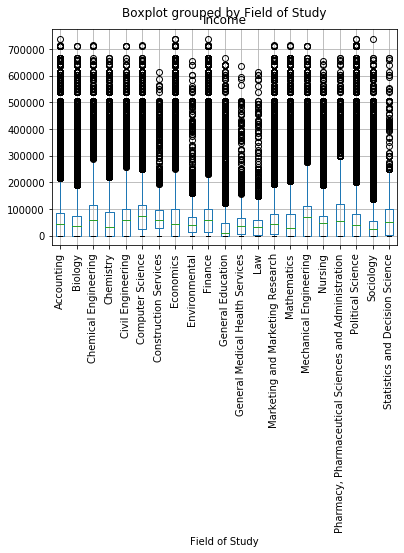

In [47]:
rename_df.boxplot(by = "Field of Study", column = ["Income"], rot = 90)

# Create DataFrames for plotting

### for mean data

In [13]:
comment = '''    
What I need:
dictionary_template = { "Field0":[bachelor_income_mean, bachelor_income_std, 
                                  master_income_mean, master_income_std,
                                  phd_income_mean, phd_income_std ],
                        "Field1":[bachelor_income_mean, bachelor_income_std, 
                                  master_income_mean, master_income_std,
                                  phd_income_mean, phd_income_std ], .... }
'''
field_mean_std_df = rename_df.copy()
mean_sr = field_mean_std_df.groupby(['Field of Study', 'Educational Attainment' ])['Income'].mean()
mean_df = mean_sr.to_frame()
# rounding the mean values to 2 decimal places
mean_df.rename(columns={'Income':'Mean'}, inplace=True)
mean_df['Mean'] = mean_df['Mean'].apply(lambda x: round(x, 2))
mean_df

#for display
mean_pivt = mean_df.pivot_table(index='Educational Attainment', columns='Field of Study', values='Mean')
mean_pivt

Field of Study,Accounting,Biology,Chemical Engineering,Chemistry,Civil Engineering,Computer Science,Construction Services,Economics,Environmental,Finance,...,General Medical Health Services,Law,Marketing and Marketing Research,Mathematics,Mechanical Engineering,Nursing,"Pharmacy, Pharmaceutical Sciences and Administration",Political Science,Sociology,Statistics and Decision Science
Educational Attainment,,,,,,,,,,,,,,,,,,,,,
Bachelors_Degree,58513.32,38824.20,69208.28,41516.11,65334.55,75923.86,72303.08,65990.67,45125.49,76557.24,...,35628.08,42900.33,57108.58,47518.30,67435.37,44267.35,59415.19,53530.06,34323.26,58661.08
Masters_Degree,82731.09,56473.68,88943.39,57298.30,82412.33,96926.06,78276.62,92381.57,63289.30,105986.74,...,56443.63,51377.62,73418.89,57880.33,92748.39,64989.60,66742.14,68410.70,41135.92,73366.30
PHD,80158.99,97400.19,98375.90,88141.87,80231.42,127073.19,44896.43,99615.67,79176.86,100025.74,...,70276.52,72775.14,68725.07,82008.13,95814.38,81972.48,101906.14,80181.81,57357.32,101136.55


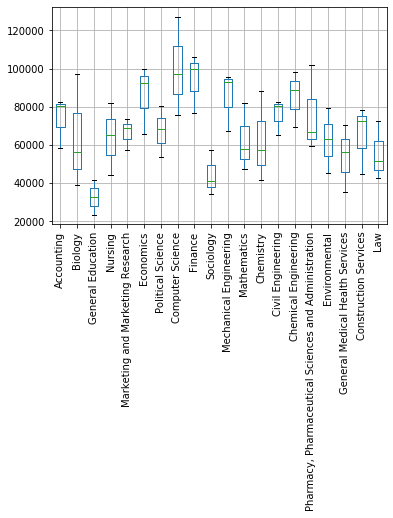

In [45]:
# box plot
mean_pivt.boxplot(column = ["Accounting", "Biology", "General Education", "Nursing", 
                           "Marketing and Marketing Research", "Economics", "Political Science", "Computer Science",
                           "Finance", "Sociology", "Mechanical Engineering", "Mathematics", "Chemistry", 
                           "Civil Engineering", "Chemical Engineering", 
                           "Pharmacy, Pharmaceutical Sciences and Administration", "Environmental", 
                           "General Medical Health Services", "Construction Services", "Law"], rot =90)

### for std data

In [14]:
std_sr = field_mean_std_df.groupby(['Field of Study', 'Educational Attainment' ])['Income'].std()
std_df = std_sr.to_frame()
# rounding the mean values to 2 decimal places
std_df.rename(columns={'Income':'std'}, inplace=True)
std_df['std'] = std_df['std'].apply(lambda x: round(x, 2))
std_df

#for display
std_pivt = std_df.pivot_table(index='Educational Attainment', columns='Field of Study', values='std')
std_pivt

Field of Study,Accounting,Biology,Chemical Engineering,Chemistry,Civil Engineering,Computer Science,Construction Services,Economics,Environmental,Finance,...,General Medical Health Services,Law,Marketing and Marketing Research,Mathematics,Mechanical Engineering,Nursing,"Pharmacy, Pharmaceutical Sciences and Administration",Political Science,Sociology,Statistics and Decision Science
Educational Attainment,,,,,,,,,,,,,,,,,,,,,
Bachelors_Degree,80956.36,53952.02,85138.84,62449.77,75703.50,74201.40,72888.15,100016.38,53030.16,97064.86,...,45018.86,57744.28,74616.49,72817.15,75645.45,43189.49,69728.28,79715.85,51087.99,76163.23
Masters_Degree,98381.62,69790.21,106401.08,78389.52,92644.57,88597.23,83697.44,126551.66,64950.53,120688.58,...,53702.66,61667.14,88340.26,83072.46,96840.92,61054.13,81963.52,89812.41,55663.16,88088.44
PHD,105062.91,110537.70,108109.52,105599.79,89736.59,117378.51,48940.22,121749.74,80447.89,121610.82,...,73736.85,105616.12,86189.76,102599.98,95899.16,87827.07,90140.29,100376.22,76604.44,102574.64


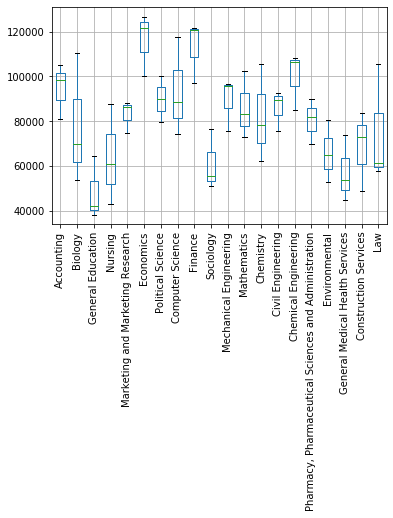

In [35]:
# box plot
std_pivt.boxplot(column = ["Accounting", "Biology", "General Education", "Nursing", 
                           "Marketing and Marketing Research", "Economics", "Political Science", "Computer Science",
                           "Finance", "Sociology", "Mechanical Engineering", "Mathematics", "Chemistry", 
                           "Civil Engineering", "Chemical Engineering", 
                           "Pharmacy, Pharmaceutical Sciences and Administration", "Environmental", 
                           "General Medical Health Services", "Construction Services", "Law"], rot =90)

In [16]:
mean_df_cpy = mean_df.copy()
std_df_cpy = std_df.copy()
mean_df_cpy.reset_index(inplace=True)
std_df_cpy.reset_index(inplace=True)
# create consolidated dictionary for plotting
data_dict = {}
FOS_list = mean_df_cpy['Field of Study'].unique().tolist()

#std_df_cpy[std_df_cpy['Field of Study'] == 'Nursing']
data_dict[''] = ['Bachelor Degree Mean', 'Bachelor Degree std', 
                          'Masters Degree Mean', 'Masters Degree Mean', 
                          'PhD Mean', 'PhD Mean']
for fos in FOS_list:
    bs_mean = mean_df_cpy[(mean_df_cpy['Field of Study'] == fos) & \
           (mean_df_cpy['Educational Attainment'] == 'Bachelors_Degree')]['Mean'].tolist()[0]
    bs_std = std_df_cpy[(std_df_cpy['Field of Study'] == fos) & \
           (std_df_cpy['Educational Attainment'] == 'Bachelors_Degree')]['std'].tolist()[0]
    
    ms_mean = mean_df_cpy[(mean_df_cpy['Field of Study'] == fos) & \
           (mean_df_cpy['Educational Attainment'] == 'Masters_Degree')]['Mean'].tolist()[0]
    ms_std = std_df_cpy[(std_df_cpy['Field of Study'] == fos) & \
           (std_df_cpy['Educational Attainment'] == 'Masters_Degree')]['std'].tolist()[0]
    
    phd_mean = mean_df_cpy[(mean_df_cpy['Field of Study'] == fos) & \
           (mean_df_cpy['Educational Attainment'] == 'PHD')]['Mean'].tolist()[0]
    phd_std = std_df_cpy[(std_df_cpy['Field of Study'] == fos) & \
           (std_df_cpy['Educational Attainment'] == 'PHD')]['std'].tolist()[0]
    
    data_dict[fos] = [bs_mean, bs_std, ms_mean, ms_std, phd_mean, phd_std]
    
comment = '''
The data_dict template is:
{<field labe>:<list of values>}

{'Field of study':[ bachelors_degree_mean, bachelors_degree_std, 
                    masters_degree_mean, masters_degree_std, 
                    PhD_mean, PhD_std ]  
}
'''    
#from pprint import pprint
#pprint(data_dict)

In [17]:
data_df = pd.DataFrame(data_dict)
data_df.set_index('')

,Accounting,Biology,Chemical Engineering,Chemistry,Civil Engineering,Computer Science,Construction Services,Economics,Environmental,Finance,...,General Medical Health Services,Law,Marketing and Marketing Research,Mathematics,Mechanical Engineering,Nursing,"Pharmacy, Pharmaceutical Sciences and Administration",Political Science,Sociology,Statistics and Decision Science
,,,,,,,,,,,,,,,,,,,,,
Bachelor Degree Mean,58513.32,38824.20,69208.28,41516.11,65334.55,75923.86,72303.08,65990.67,45125.49,76557.24,...,35628.08,42900.33,57108.58,47518.30,67435.37,44267.35,59415.19,53530.06,34323.26,58661.08
Bachelor Degree std,80956.36,53952.02,85138.84,62449.77,75703.50,74201.40,72888.15,100016.38,53030.16,97064.86,...,45018.86,57744.28,74616.49,72817.15,75645.45,43189.49,69728.28,79715.85,51087.99,76163.23
Masters Degree Mean,82731.09,56473.68,88943.39,57298.30,82412.33,96926.06,78276.62,92381.57,63289.30,105986.74,...,56443.63,51377.62,73418.89,57880.33,92748.39,64989.60,66742.14,68410.70,41135.92,73366.30
Masters Degree Mean,98381.62,69790.21,106401.08,78389.52,92644.57,88597.23,83697.44,126551.66,64950.53,120688.58,...,53702.66,61667.14,88340.26,83072.46,96840.92,61054.13,81963.52,89812.41,55663.16,88088.44
PhD Mean,80158.99,97400.19,98375.90,88141.87,80231.42,127073.19,44896.43,99615.67,79176.86,100025.74,...,70276.52,72775.14,68725.07,82008.13,95814.38,81972.48,101906.14,80181.81,57357.32,101136.55
PhD Mean,105062.91,110537.70,108109.52,105599.79,89736.59,117378.51,48940.22,121749.74,80447.89,121610.82,...,73736.85,105616.12,86189.76,102599.98,95899.16,87827.07,90140.29,100376.22,76604.44,102574.64
